# Locally Weighted Regression
1. Read and Normalise the Dataset
2. Generate W for every query point!
3. No training is involved, directly make predictions using closed form solution we dervied!
<br>
(X′WX)inv * X′WY where X' is X_Transpose
4. Find the best value of Tau(Bandwidth Parameter) [Cross Validation]

## 1. Loading Data

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
dfx = pd.read_csv("../Datasets/Locally Weighted Regression/weightedX.csv")
dfy = pd.read_csv("../Datasets/Locally Weighted Regression/weightedY.csv")

x = dfx.values
y = dfy.values

print(x.shape, y.shape)

(99, 1) (99, 1)


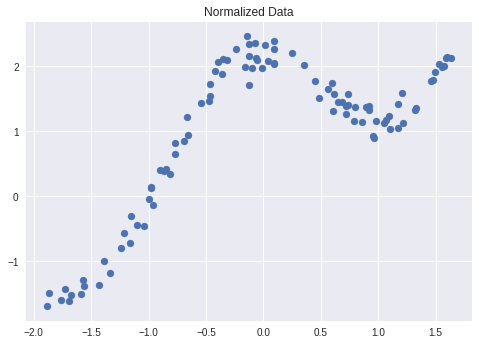

In [80]:
# Normalize the data
x = (x-x.mean())/x.std()

# Visualize
plt.style.use("seaborn")
plt.title("Normalized Data")
plt.scatter(x,y)
plt.show()

## 2. Find out W (mxm) diagonal matrix

print(type(np.eye(5)))

For a,b-->matrices
a*b = Matrix Multiplication

For a,b-->arrays
a*b = Element Wise

In [81]:
def getW(query_point, X, tau):
    
    M = X.shape[0]
    W = np.eye(M)
    
    for i in range(M):
        xi = X[i]
        W[i][i] = np.exp(-np.dot((xi-query_point),(xi-query_point).T)/(2*tau*tau) )
    return W

In [82]:
X = np.mat(x)
Y = np.mat(y)
M = X.shape[0]

# If tau is large, it becomes identity matrix
# tau denotes points upto how far must be taken in account
W = getW(-1, X, 1)
print(W)

[[ 0.81327022  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.98353311  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.81193405 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.59936711  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.2758226   0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.08496804]]


## 3. Make Predictions

In [83]:
def predict(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    qx = np.mat([query_x,1])
    
    W = getW(qx,X,tau)
    
    # (X′WX)inv * X′WY where X' is X_Transpose
    theta = np.linalg.pinv(X_.T*(W*X_)) * (X_.T*(W*Y))
    pred = np.dot(qx,theta)
    return theta,pred

In [84]:
theta,pred = predict(X,Y,1.0,1.0)
print(theta)

[[-0.13503432]
 [ 1.6591292 ]]


In [85]:
# Predicted value of y for x = 1.0
# Correct for this curve
print(pred)

[[ 1.52409488]]


## 4. Visualise Predictions, Analyse the Effect of Tau

In [90]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    for xt in X_test:
        theta,pred = predict(X,Y,xt,tau)
        Y_test.append(pred)
        
    Y_test = np.array(Y_test)
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Paramater %2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test)
    plt.show()

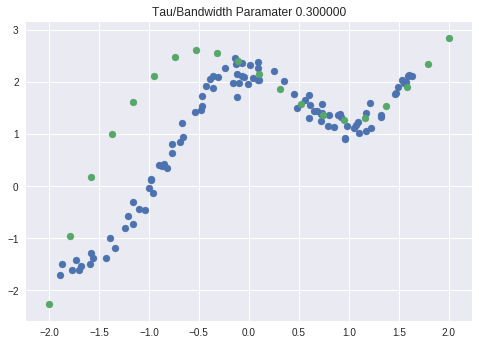

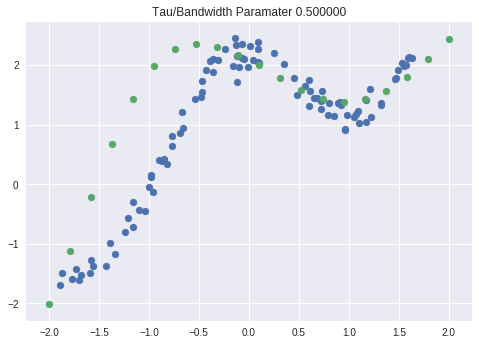

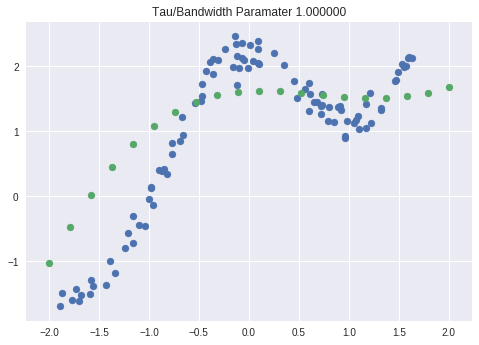

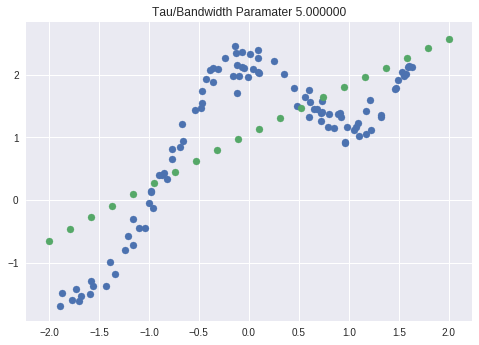

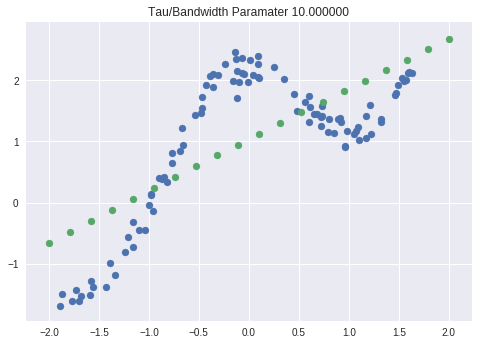

In [91]:
# As tau increases, curve approached linear regression
taus = [0.3,0.5,1.0,5.0,10.0]
for tau in taus:
    plotPrediction(tau)